## Natural Language Processing - Final Project

__Group Members:__
1) Aanal Patel - C0910376
2) Bimal Shresta - C0919385
3) Danilo Diaz - C0889539
4) Ernie Sumoso - C0881591
5) Jayachandhran Saravanan - C0910392

### Imporing python packages and Data

In [1]:
import pandas as pd # Preprocessing library 
from pandas import read_csv
import numpy as np # liniear algebra
from tabulate import tabulate # library used to create a tabel format 
import matplotlib.pyplot as plt # data visualization libraray
import seaborn as sns # data visualization libraray
from nltk.tokenize import sent_tokenize, word_tokenize # tokenization methods from nltk package
import re # regular expression
from nltk.corpus import stopwords # list of stop words 
from nltk.stem import WordNetLemmatizer # lemmatization method
from wordcloud import WordCloud # To create a word cloud
from sklearn.preprocessing import LabelEncoder # To convert catagories into numaric data
from os import listdir # File manipulation
from os.path import isfile, isdir, join # To fetch the data files
import PyPDF2 # To process the PDFs 
import string # to process strings
from textblob import TextBlob
from collections import Counter # To count the similaritys
impor nltk # To process text data

In [2]:
class loadData:
    def __init__(self):
        pass
    
    def loadCSVFile(self, path):
        '''
            function: loadCSVFile -> read the csv file 
            arg: path (str) -> path of the file
            return: df (pandas.core.frame.DataFrame) -> data frame 
        '''
        df = read_csv(path) # reading the data file of job description
        return df
    
    def get_list_of_files(self,data_path):
        '''
            function: get_list_of_files -> creates a list of the file paths 
            arg: data_path (str) -> path of the file
            return: files (list) -> List of files
        '''
        # get list of files from the data path
        files = [file for file in listdir(data_path) if isfile(join(data_path, file))]
        # get list of folders from the data path
        dirs = [(file, join(data_path, file)) for file in listdir(data_path) if isdir(join(data_path, file))]
        # get files from each folder
        for i, dir_ in enumerate([d[1] for d in dirs]):
            files += [(dirs[i][0], join(dir_, file), file) for file in listdir(dir_) if isfile(join(dir_, file))]
        return files
    
    def get_text_from_pdf(self, file_path):
        '''
            function: get_text_from_pdf -> fetch the data from the file path
            arg: file_path (str) -> path of the file
            return: text (str) -> content of the file
        '''
        file = open(file_path, 'rb')
        reader = PyPDF2.PdfReader(file) # reading the PDF file
        text = ""
        for page in reader.pages:
            text += page.extract_text() # extracting the data of the pdf file
        file.close()
        return text

    def convert_pdfs_into_dataframe(self, pdfs):
        '''
            function: convert_pdfs_into_dataframe -> converts pdf data into a data frame 
            arg: pdfs (list) -> list of the file paths
            return: df (pandas.core.frame.DataFrame) -> Data frame 
        '''
        rows = []
        for pdf in pdfs:
            rows.append({'file': pdf[2], 'profession': pdf[0], 'resume':self.get_text_from_pdf(pdf[1])})
        df = pd.DataFrame(rows)
        return df

In [3]:
data = loadData()
dfJobDes = data.loadCSVFile('jobs_11441.csv')

In [4]:
dfJobDes.tail() # displying last 5 rows

,site,job_url,job_url_direct,title,company,location,job_type,date_posted,interval,min_amount,...,company_url_direct,company_addresses,company_industry,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url
11436,indeed,https://ca.indeed.com/viewjob?jk=df6c6db3c795cb3c,https://apply-v3.jobsync.io/indeed/r-app/50dcc...,Platform and Process Analyst,GardaWorld,"Montréal, QC, CA",NaN,2024-02-20,NaN,NaN,...,http://www.garda.com,"Saint-Laurent, QC",NaN,"10,000+",$1B to $5B (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...
11437,indeed,https://ca.indeed.com/viewjob?jk=6448decf66b30d07,https://www.jobbank.gc.ca/jobsearch/jobposting...,business systems analyst,NaN,"Calgary, AB, CA","p, fulltime",2024-01-30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11438,indeed,https://ca.indeed.com/viewjob?jk=6f7df7d3092cc9fa,https://www.jobbank.gc.ca/jobsearch/jobposting...,business systems analyst,Avant Techno Solutions,"Markham, ON, CA",fulltime,2024-01-19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11439,indeed,https://ca.indeed.com/viewjob?jk=5377f75fbb708768,https://www.jobbank.gc.ca/jobsearch/jobposting...,marketing analyst,Leanessa Inc,"Brampton, ON, CA",fulltime,2024-01-11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11440,indeed,https://ca.indeed.com/viewjob?jk=c1fb8bd8c7af252a,https://www.jobbank.gc.ca/jobsearch/jobposting...,database analyst,Meta Connections Inc.,"Chilliwack, BC, CA",fulltime,2024-01-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_1 = data.get_list_of_files('Data_source_1')
data_2 = data.get_list_of_files('Data_source_2')
print(len(data_2))
data_2[:10]

2348


[('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\10554236.pdf', '10554236.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\10674770.pdf', '10674770.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\11163645.pdf', '11163645.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\11759079.pdf', '11759079.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\12065211.pdf', '12065211.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\12202337.pdf', '12202337.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\12338274.pdf', '12338274.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\12442909.pdf', '12442909.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\12780508.pdf', '12780508.pdf'),
 ('ACCOUNTANT', 'Data_source_2\\ACCOUNTANT\\12802330.pdf', '12802330.pdf')]

In [6]:
dfResume = data.convert_pdfs_into_dataframe(data_2)
dfResume.tail()

,file,profession,resume
2343,87118391.pdf,SALES,SALES\nSummary\nAccount Manager focused on max...
2344,90682785.pdf,SALES,SALES ASSOCIATE\nExperience\nSales Associate\n...
2345,92200491.pdf,SALES,SALES REPRESENTATIVE\nSummary\nFood service wo...
2346,98108571.pdf,SALES,SALES ASSOCIATE\nExperience\n04/2016\n \nto \n...
2347,98509238.pdf,SALES,SALES SUPERVISOR - SALES EFFECTIVENESS\nSummar...


In [7]:
df_Resume = dfResume.copy()

In [8]:
class EDABasic:
    def __init__(self, df):
        '''
            function: Constructor
            arg: df (pandas.core.frame.DataFrame) -> dataframe to perform EDA
            return: None
        '''
        self.df = df
        self.basicEDA()
        
    def basicEDA(self):
        '''
            function: basicEDA -> This function will call the function that are used for EDA
            arg: None
            return: None
        '''
        self.shapeAndSizeFunction()
        self.nullValuesFunction()
        self.duplicatedFunction()
        self.infoFunction()

    def shapeAndSizeFunction(self):
        '''
            function: shapeAndSizeFunction -> It is a function to check the shape and the size of the data set
            arg: None
            return: None
        '''
        # checking the shape of the data frame
        self.printLine()
        shape = self.df.shape
        print("SHAPE OF DATAFRAME:")
        print('Columns = {}'.format(shape[0]))
        print('Rows = {}'.format(shape[1]))
        size = self.df.size
        self.printLine()
        print("SIZE OF DATAFRAME: {}".format(size))
        
    def nullValuesFunction(self):
        '''
            function: nullValuesFunction -> It is a function to check the count of the missing values in the dataframe
            arg: None
            return: None
        '''
        # cheking the missing values
        nullValues = self.df.isna().sum()
        noNull = 'No Null values' if nullValues.sum == 0 else nullValues
        self.printLine()
        print('Checking the missing values:\n')
        print('Missing values:\n{}'.format(noNull))
        
    def duplicatedFunction(self):
        '''
            function: duplicatedFunction -> It is a function to check the count of the duplicate rows in the dataframe
            arg: None
            return: None
        '''
        # checking the duplicates
        duplicates = self.df.duplicated().sum()
        noduplicates = 'No Duplicat values' if duplicates == 0 else duplicates
        self.printLine()
        print('Checking the Duplicate values:')
        print('Duplicate values = {}'.format(noduplicates))
        
    def infoFunction(self):
        '''
            function: infoFunction -> This function will give the basic information about the dataframe
            arg: None
            return: None
        '''
        # information of the data set
        self.printLine()
        print('The information: ')
        print(self.df.info(),'')
    
    def boolPlot(self, col):
        '''
            function: boolPlot -> This function plots pie chart for boolean values
            arg: col(str) -> name of the column
            return: None
        '''
        size = self.df[col].value_counts()
        plt.pie(size, labels=size.index, autopct='%1.1f%%')
        plt.legend(labels=size.index)
        plt.title('boolean feature:{}'.format(col))
        plt.show()
        
    def barPlot(self, col):
        '''
            function: barPlot -> This function plots bar chart for catagorical values.
            arg: col(str) -> name of the column
            return: None
        '''
        size = self.df[col].value_counts()
        percent = round((size * 100) / self.df.shape[0], 1) # claulating the percentage of the frequency
        sns.barplot(x=percent.index, y=percent.values, palette='dark')
        plt.xticks(rotation=90)
        plt.title('feature:{}'.format(col))
        
        plt.show()
        
    def printLine(self):
        '''
            function: printLine -> This function will provide the print format for the class output
            arg: None
            return: None
        '''
        # creting the print format
        print('-'*50, '\n')
        

In [9]:
print('BASIC EDA FOR JOB DESCRIPTION')
eda = EDABasic(dfJobDes) # creating a class instance for Job description data frame

BASIC EDA FOR JOB DESCRIPTION
-------------------------------------------------- 

SHAPE OF DATAFRAME:
Columns = 11441
Rows = 26
-------------------------------------------------- 

SIZE OF DATAFRAME: 297466
-------------------------------------------------- 

Checking the missing values:

Missing values:
site                         0
job_url                      0
job_url_direct               0
title                        0
company                    102
location                     0
job_type                  2247
date_posted                  0
interval                 11441
min_amount               11441
max_amount               11441
currency                 11441
is_remote                    0
emails                    9633
description                  0
company_url                 89
company_url_direct        4194
company_addresses         4826
company_industry          8709
company_num_employees     4897
company_revenue           6600
company_description       6922
logo_photo_

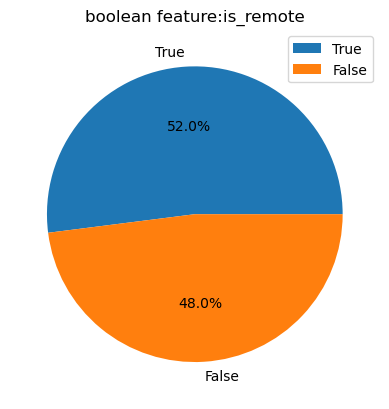

In [10]:
eda.boolPlot('is_remote')

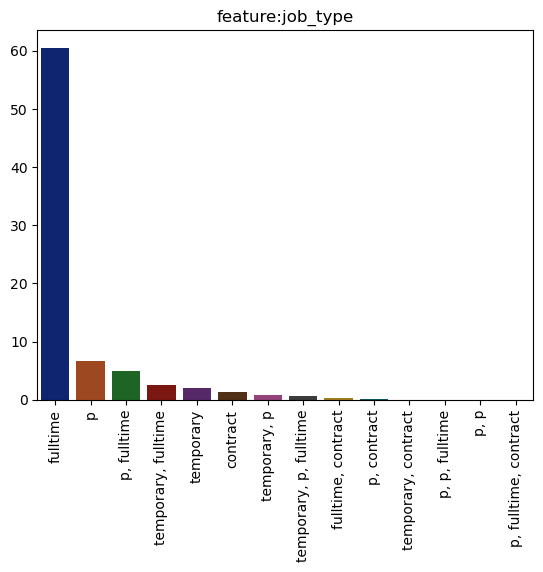

In [11]:
eda.barPlot('job_type')

In [12]:
print('BASIC EDA FOR RESUME')
edaResume = EDABasic(df_Resume) # creating a class instance for Resume data frame

BASIC EDA FOR RESUME
-------------------------------------------------- 

SHAPE OF DATAFRAME:
Columns = 2348
Rows = 3
-------------------------------------------------- 

SIZE OF DATAFRAME: 7044
-------------------------------------------------- 

Checking the missing values:

Missing values:
file          0
profession    0
resume        0
dtype: int64
-------------------------------------------------- 

Checking the Duplicate values:
Duplicate values = No Duplicat values
-------------------------------------------------- 

The information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file        2348 non-null   object
 1   profession  2348 non-null   object
 2   resume      2348 non-null   object
dtypes: object(3)
memory usage: 55.2+ KB
None 


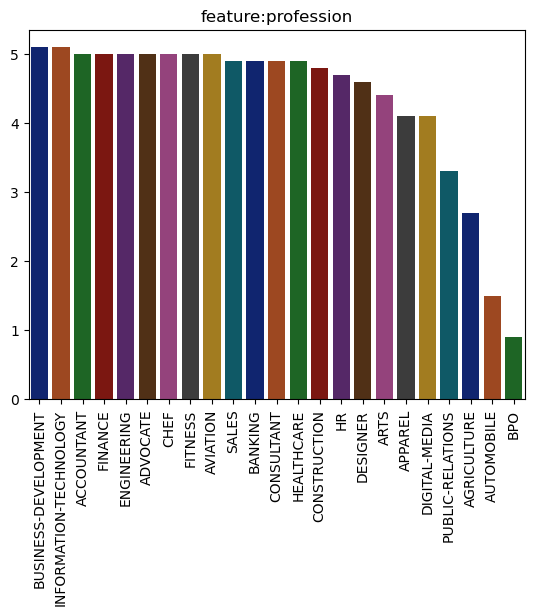

In [13]:
edaResume.barPlot('profession')

In [14]:
# pd.set_option('display.max_colwidth', None)  # Display full column width
# pd.set_option('display.max_rows', None) 

In [15]:
class Preprocessing:
    def __init__(self, df):
        '''
            function: Constructor
            arg: df (pandas.core.frame.DataFrame) -> dataframe to perform EDA
            return: None
        '''
        self.df = df
        
    def textPreprocessing(self, textData):
        '''
            function: textPreprocessing -> This function will preprocess the text data
            arg: textData (str) -> The givine string
            return: processedText (str) -> Preprocessed data 
                    tags -> part of speech tags
        '''
        textData = textData.lower() # converting text in to lower cases
        
        textData = re.sub(r'[^a-zA-Z0-9\s]',' ', textData) # removing all the special characters from the text
        
#         sentTokenizeList = sent_tokenize(textData)
        # creating the list of the stop words.
        # job posts contains french and English text 
        stopWordsEng = set(stopwords.words('english'))
        stopWordsFre = set(stopwords.words('french'))
        
        # creating an instance for the lemmatization
        lemmetizing = WordNetLemmatizer()
        processedSentList = []
        wordTokenized = word_tokenize(textData)
        tokens = [word for word in wordTokenized if word not in stopWordsEng] # removing English stop words
        tokens = [word for word in wordTokenized if word not in stopWordsFre] # removing French stop words
        
#         lemmatizedTokens = [lemmetizing.lemmatize(word, pos='V') for word in tokens] # converting text into it's root form
        processedText = ' '.join(tokens)
        
#         blob = TextBlob(' '.join(tokens)) # pos tagging words
#         tags = [tag for tag in blob.tags if tag[1].startswith('v')]
        
        return  processedText # pd.Series([processedText, tags])
    
    def textEDA(self):
        '''
            function: textEDA -> This function will disply word clouds for remot and In person jobs
            arg: None
            return: None
        '''
        remotDf = self.df[self.df['is_remote'] == True] # Datafreme that contains only remote jobs
        NonremotDf = self.df[self.df['is_remote'] == False] # Datafreme that contains only In-person jobs
        
        self.printLine()
        print('Word colud for Remot Jobs')
        self.printLine()
        text_isRemot = remotDf['preprocessedText'].str.cat(sep=' ')
        # Word cloud creation for remot jobs
        isRemot_wordcloud = WordCloud(width=800, height=500,background_color='black').generate(text_isRemot) 
        plt.imshow(isRemot_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
        self.printLine()
        print('Word colud for In-person jobs')
        self.printLine()
        text_isNotRemot = NonremotDf['preprocessedText'].str.cat(sep=' ')   
        # Word cloud creation for In-person jobs
        isNotRemot_wordcloud = WordCloud(width=800, height=500,background_color='black').generate(text_isNotRemot)
        plt.imshow(isNotRemot_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    
    def droppingColumns(self):
        '''
            function: droppingColumns -> This function will drop all the unnecessary columns 
            arg: None
            return: None
        '''
        '''
            All of the columns are not necessary and also have high rate of missing values, 
            so these will not be beneficial for the anaysis and prediction
            site -> The site from where the data is scrapped (Fixed value -> indeed)
            emails -> Email of the contact preson for the job inquiry
            job_url_direct -> URL for job application
            company_url -> URL for company site
            company_url_direct -> URL for job application on company's site
            logo_photo_url -> URL for logo of the company
            banner_photo_url -> URL for logo of the company
            ceo_photo_url -> URL for CEO's phot
            company_addresses -> Address of the company
            company_num_employees -> number of employees in the company
            company_revenue -> the revenue generated by company
            company_description -> details of the company
            ceo_name -> name of the company CEO
            date_posted -> date of the job posted 
            company_industry -> Domain of the company
        '''
        '''
            All of these columns are not useful due to the high percentage of missing vlaues 
            interval
            min_amount 
            max_amount
            currency
        '''
        cols = ['site', 'job_url', 'job_url_direct', 'interval', 'min_amount', 'max_amount','currency','emails', 'company_url', 
                'company_url_direct', 'logo_photo_url', 'banner_photo_url', 'ceo_photo_url', 'company_addresses', 
                'company_num_employees', 'company_revenue', 'company_description', 'company_description', 'ceo_name',
                'date_posted', 'company_industry']
        self.df.drop(columns=cols, inplace=True)
        
    def dropDuplicates(self):
        '''
            function: dropDuplicates -> This function will drop duplicates
            arg: None
            return: None
        '''
        # dropping duplicates 
        self.df.drop_duplicates(inplace=True)
    
    def CatlabelEncoding(self, column):
        '''
            function: labelEncoding -> performs label encoding on the catagorical columns
            arg: column (List) -> List of the names of the columns 
            return: None
        '''
        labelEncoder = LabelEncoder()
        for col in column:
            self.df[col] = labelEncoder.fit_transform(self.df[col])

    def printLine(self):
        '''
            function: printLine -> This function will provide the print format for the class output
            arg: None
            return: None
        '''
        # creting the print format
        print('-'*120)


In [16]:
preprocess = Preprocessing(dfJobDes)

In [18]:
# dfJobDes[['preprocessedText', 'JobVerbs']] = dfJobDes['description'].apply(preprocess.textPreprocessing)
dfJobDes['preprocessedText'] = dfJobDes['description'].apply(preprocess.textPreprocessing)

In [19]:
preprocess.droppingColumns()

In [20]:
preprocess.dropDuplicates()

------------------------------------------------------------------------------------------------------------------------
Word colud for Remot Jobs
------------------------------------------------------------------------------------------------------------------------


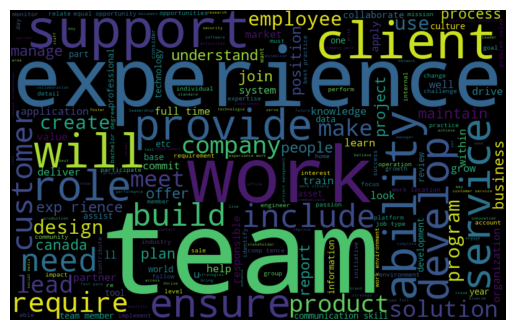

------------------------------------------------------------------------------------------------------------------------
Word colud for In-person jobs
------------------------------------------------------------------------------------------------------------------------


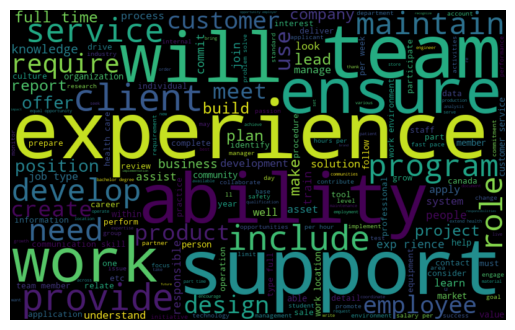

In [21]:
preprocess.textEDA()

In [22]:
preprocess.CatlabelEncoding(['is_remote'])

In [24]:
dfJobDes.tail(1)

,title,company,location,job_type,is_remote,description,preprocessedText
11440,database analyst,Meta Connections Inc.,"Chilliwack, BC, CA",fulltime,0,* Education:\n* Expérience:\n**Education**\n--...,education exp rience education college cegep o...


In [28]:
preprocessResume = Preprocessing(df_Resume)

In [29]:
# df_Resume[['preprocessedText', 'ResumeVerbs']] = df_Resume['resume'].apply(preprocess.textPreprocessing)
df_Resume['preprocessedText'] = df_Resume['resume'].apply(preprocess.textPreprocessing)

In [30]:
df_Resume.tail()

,file,profession,resume,preprocessedText
2343,87118391.pdf,SALES,SALES\nSummary\nAccount Manager focused on max...,sales summary account manager focus maximize s...
2344,90682785.pdf,SALES,SALES ASSOCIATE\nExperience\nSales Associate\n...,sales associate experience sales associate 01 ...
2345,92200491.pdf,SALES,SALES REPRESENTATIVE\nSummary\nFood service wo...,sales representative summary food service work...
2346,98108571.pdf,SALES,SALES ASSOCIATE\nExperience\n04/2016\n \nto \n...,sales associate experience 04 2016 to current ...
2347,98509238.pdf,SALES,SALES SUPERVISOR - SALES EFFECTIVENESS\nSummar...,sales supervisor sales effectiveness summary e...


## Verbs simmilarity analysis

In [60]:
def get_pos_tags(tokens):
    blob = TextBlob(' '.join(tokens)) # pos tagging words
    tags = [tag for tag in blob.tags if tag[1].startswith('V')]
    return tags

In [58]:
jobesTokens = [word_tokenize(text) for text in dfJobDes['preprocessedText']] # creating tokens for jobDes df
resumeTokens = [word_tokenize(text) for text in df_Resume['preprocessedText']] # creating tokens for resume df

In [61]:
jobDesTags = [tag for sublist in [get_pos_tags(tokens) for tokens in jobesTokens] for tag in sublist] # creating POS tags for jobDes df
resumeTags = [tag for sublist in [get_pos_tags(tokens) for tokens in resumeTokens] for tag in sublist] # creating POS tags for resume df

In [64]:
# count the occurance of each verb
jobDesVerbCount = Counter(jobDesTags) 
resumeVerbCount = Counter(resumeTags)

In [66]:
# claculate the percentage of similarity
commonVerbCounts = sum(min(jobDesVerbCount[verb], resumeVerbCount[verb]) for verb in jobDesVerbCount)
jobDesTotalVerbs = sum(jobDesVerbCount.values())
similarityPercentage = commonVerbCounts * 100 / len(jobDesTags)
print("% verbs simmilarity: {:.2f}".format(similarityPercentage))

% verbs simmilarity: 21.74


## Keywords (named entities) simmilarity analysis

In [80]:

def get_named_entities(text):
    sentences = sent_tokenize(text) # sentence tokenization
    tokens = [word_tokenize(sent) for sent in sentences] # word tokenize each sentence
    tags = [nltk.pos_tag(sent) for sent in tokens] # pos tagging each word
    chunks = nltk.ne_chunk_sents(tags, binary=True) # set named entity chunks
    named_entities = []
    for sent in chunks: # save named entities from text
#         for chunk in sent:
        if hasattr(sent, "label") and sent.label() == 'NE':
                named_entities.append(' '.join(word for word, _ in sent.leaves()))
    return named_entities

In [81]:
def extract_specific_named_entities(nes, tag):
#     named_entities = []
    # extract only named entities with equal tag
#     for ne in nes:
#         named_entity = [word[0] for word in ne if word[1] == tag] # compare tags
#         named_entity = ' '.join(named_entity) # stringify list
#         if named_entity != "":
#             named_entities.append(named_entity) # add named entity to list
    return list(set(ne for ne in nes if ne[1] == tag))# return only unique values

In [ ]:
#text = [tag for sublist in [text for text in dfJobDes['preprocessedText']] for tag in sublist]
text = dfJobDes['preprocessedText'].apply(get_named_entities).explode()#.tolist()
nes = get_named_entities(text)
nes_jobdesc = extract_specific_named_entities(nes, 'NNP')
nes_jobdesc